In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import os
from matplotlib_venn import venn3, venn3_circles


In [2]:
final_result_dir = 'gpt-4_predictions/final_result/'
save_dir = 'plots/'

In [3]:
# list of all files in the directory
files = [f for f in os.listdir(final_result_dir) if f.endswith('.csv')]

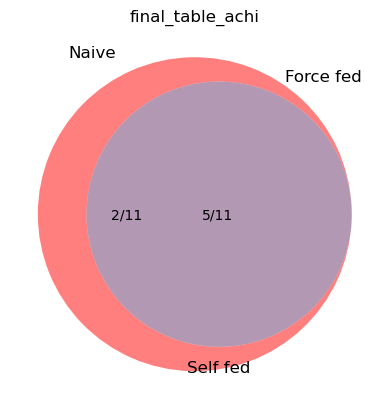

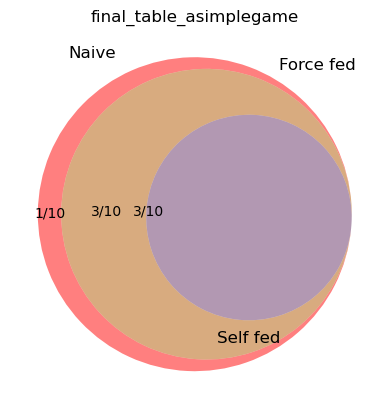

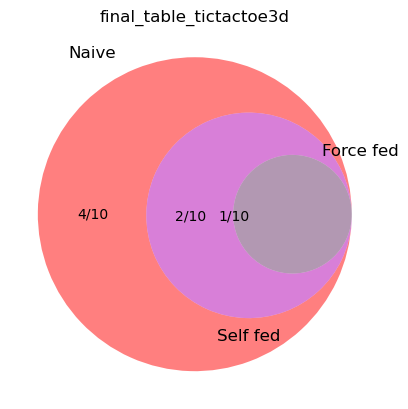

In [11]:
for file in files:
    df = pd.read_csv(final_result_dir + file, index_col=0).dropna()
    df.index = df.index.astype(int)
    binary_cols = ['naive answer', 'naive reason', 'force-fed answer', 'force-fed reason','self-fed answer', 'self-fed reason']

    for col in binary_cols:
        df[col] = df[col].astype(int)
    subsets = {'000': 0, '001': 0, '010': 0, '011': 0, '100': 0, '101': 0, '110': 0, '111': 0}
    for i in range(len(df)):
        subsets[''.join([str(df['naive answer'][i]), str(df['force-fed answer'][i]), str(df['self-fed answer'][i])])] += 1

    venn3(subsets=subsets, set_labels=('Naive', 'Force fed', 'Self fed'), subset_label_formatter=lambda x: f"{x}/{len(df)}", alpha=0.5)
    game_title = file[:-4].split('_')[-1]
    plt.title(file[:-4])
    plt.savefig(save_dir + game_title + '.pdf', bbox_inches='tight')
    plt.show()

    

In [10]:
# count the number of correct answer for each model for Venn diagram

print(subsets)

{'000': 3, '001': 0, '010': 0, '011': 0, '100': 4, '101': 2, '110': 0, '111': 1}


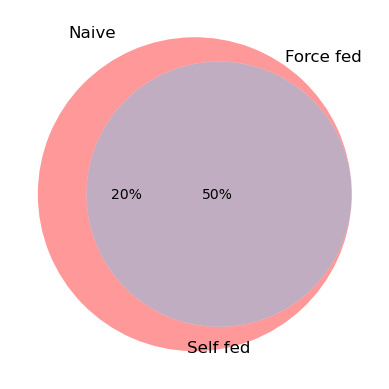

In [24]:

venn3(subsets,
              set_labels=('Naive', 'Force fed', 'Self fed'),
              subset_label_formatter=lambda x: f"{x/10 * 100:.0f}%")
plt.show()

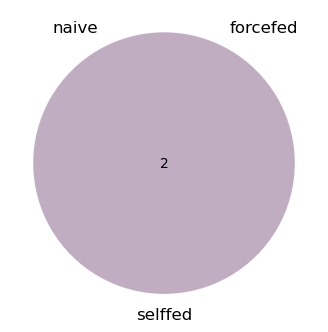

In [9]:
# make venn diagram with test accuracies
import itertools

def get_accuracies(df):
    
